<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/data_science_introducao_a_testes_estatisticos_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels=='0.12.2'
import statsmodels as sm 
sm.__version__

     |████████████████████████████████| 9.5MB 12.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


'0.12.2'

In [ ]:
import pandas as pd

tmdb = pd.read_csv('https://github.com/alura-cursos/data-science-introducao-a-testes-estatisticos-com-python/raw/master/aula0/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


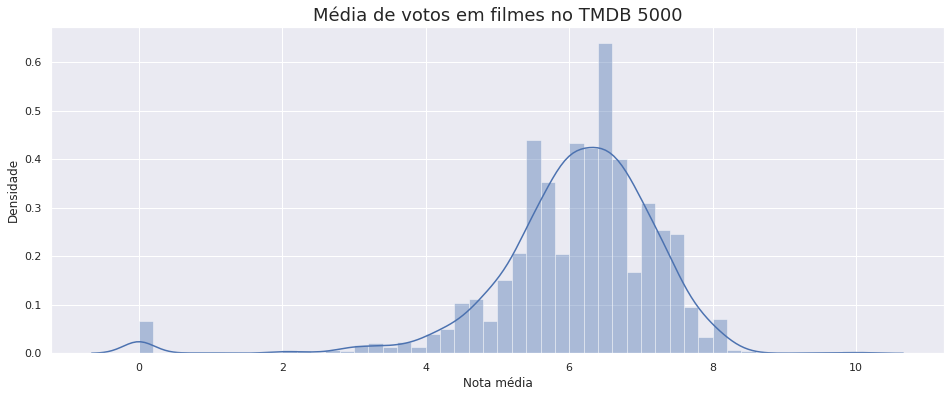

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.set_theme()

ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMDB 5000', fontsize=18);

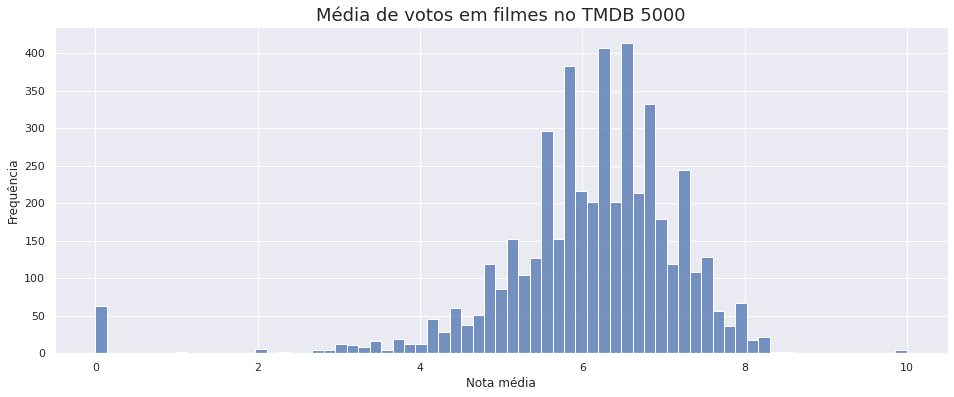

In [ ]:
import seaborn as sns

plt.figure(figsize=(16, 6))
ax = sns.histplot(tmdb.vote_average)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMDB 5000', fontsize=18);

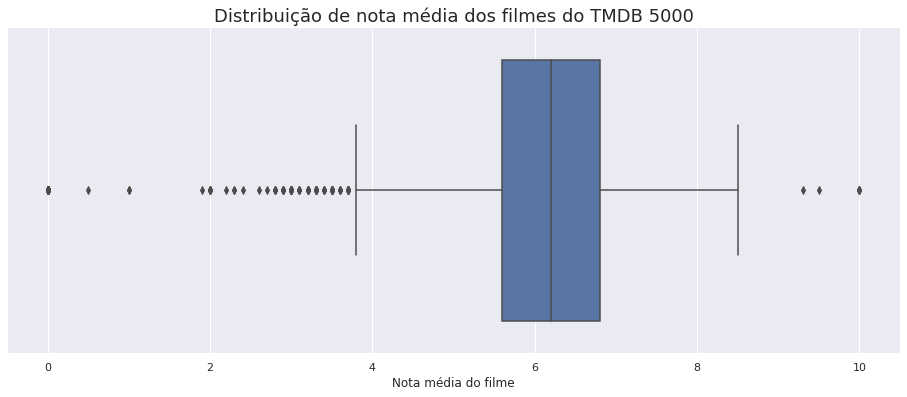

In [ ]:
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x=tmdb.vote_average)
ax.set(xlabel='Nota média do filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000', fontsize=18);

Não faz sentido filmes cuja nota média é 0 ou 10. A quantidade  de votos é muito pequena.

Vamos verificar...

In [ ]:
tmdb.query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [ ]:
tmdb.query('vote_average == 10').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


Iremos remover os filmes com poucos votos desta análise.

In [ ]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


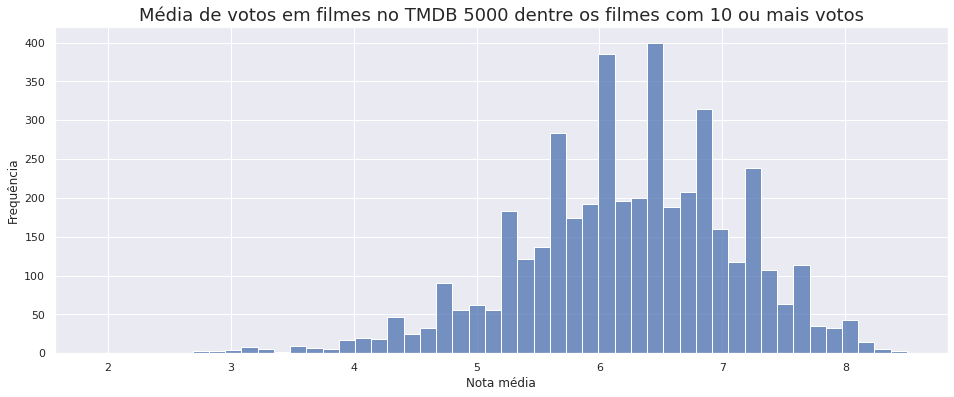

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.histplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos', fontsize=18);

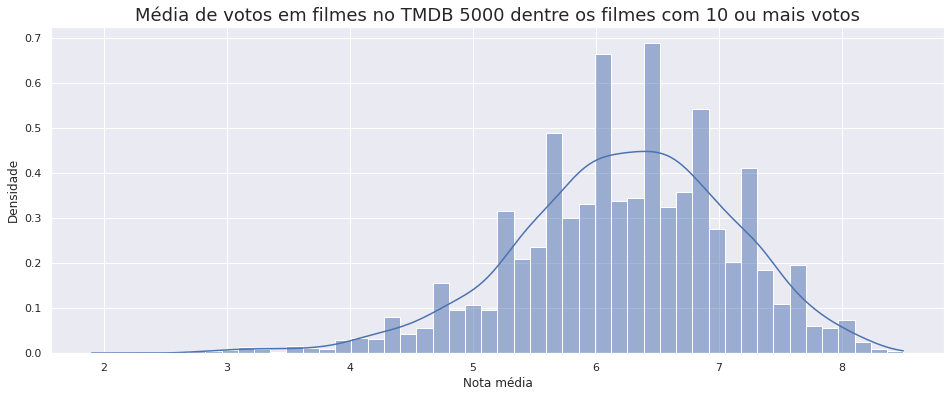

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.histplot(tmdb_com_mais_de_10_votos.vote_average, kde=True, stat='density')
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos', fontsize=18);

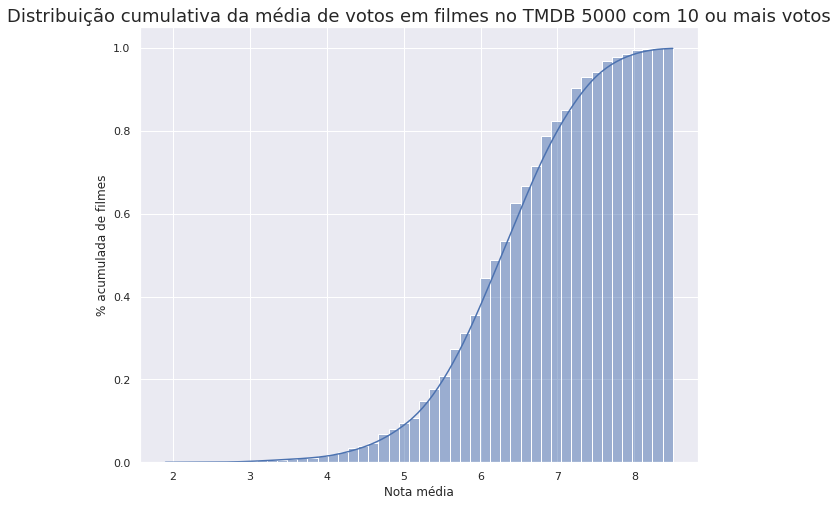

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(tmdb_com_mais_de_10_votos.vote_average, kde=True, stat='density', cumulative=True)
ax.set(xlabel='Nota média', ylabel='% acumulada de filmes')
ax.set_title('Distribuição cumulativa da média de votos em filmes no TMDB 5000 com 10 ou mais votos', fontsize=18);

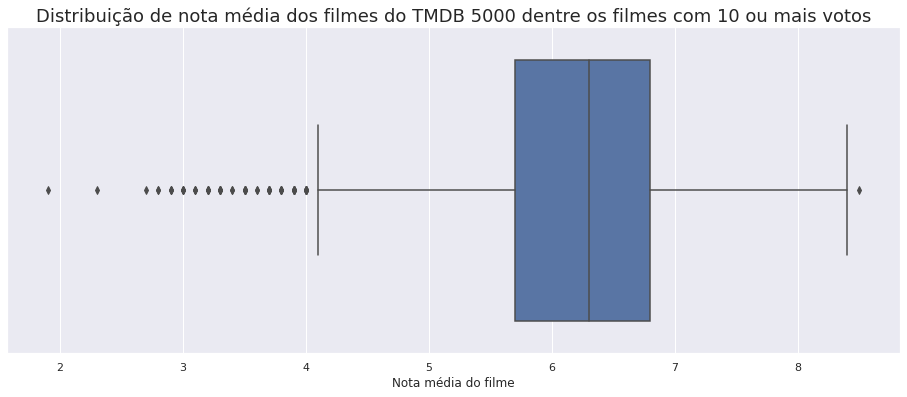

In [ ]:
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota média do filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000 dentre os filmes com 10 ou mais votos', fontsize=18);

# Analisaremos também o movielens

In [ ]:
 notas = pd.read_csv('https://github.com/alura-cursos/data-science-introducao-a-testes-estatisticos-com-python/raw/master/aula0/ratings.csv')
 notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
nota_media_por_filme = notas.groupby('movieId').mean().rating
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

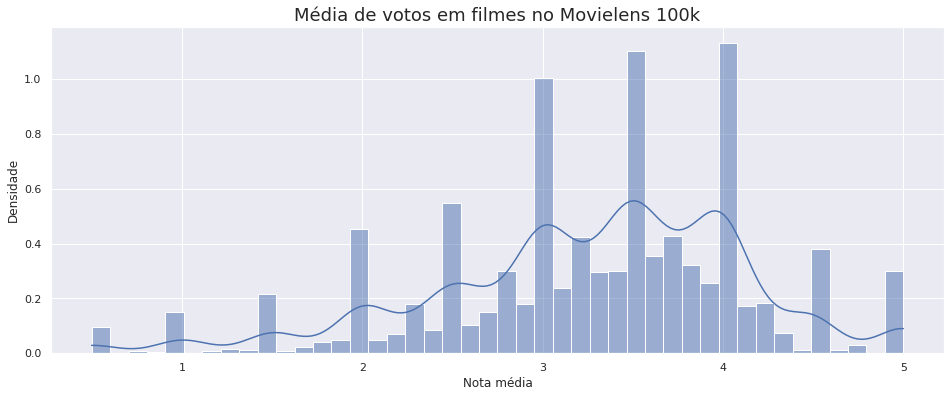

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.histplot(nota_media_por_filme.values, kde=True, stat='density')
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no Movielens 100k', fontsize=18);

In [ ]:
quantidade_de_votos_por_filme = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [ ]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

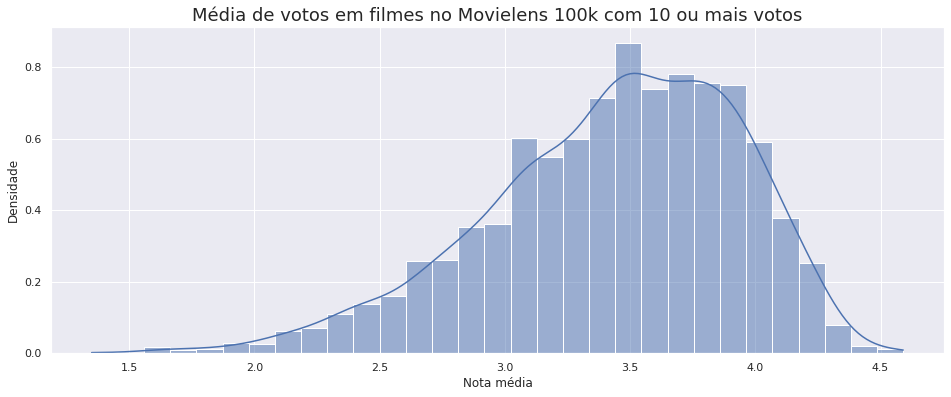

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.histplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, kde=True, stat='density')
ax.set(xlabel='Nota média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no Movielens 100k com 10 ou mais votos', fontsize=18);

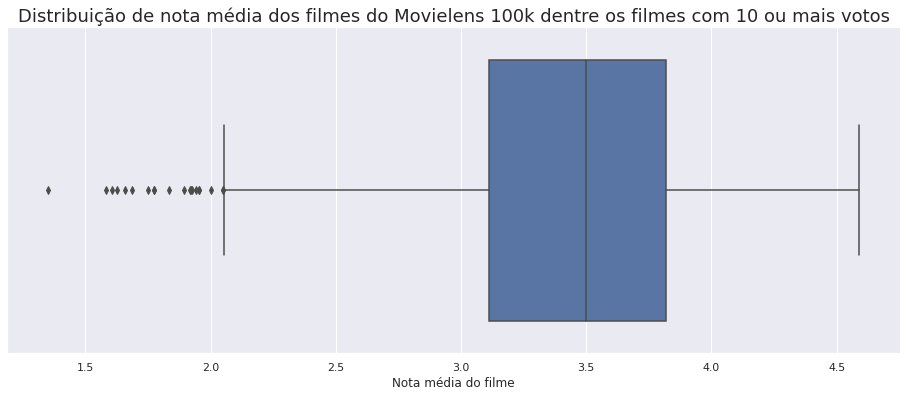

In [ ]:
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota média do filme')
ax.set_title('Distribuição de nota média dos filmes do Movielens 100k dentre os filmes com 10 ou mais votos', fontsize=18);

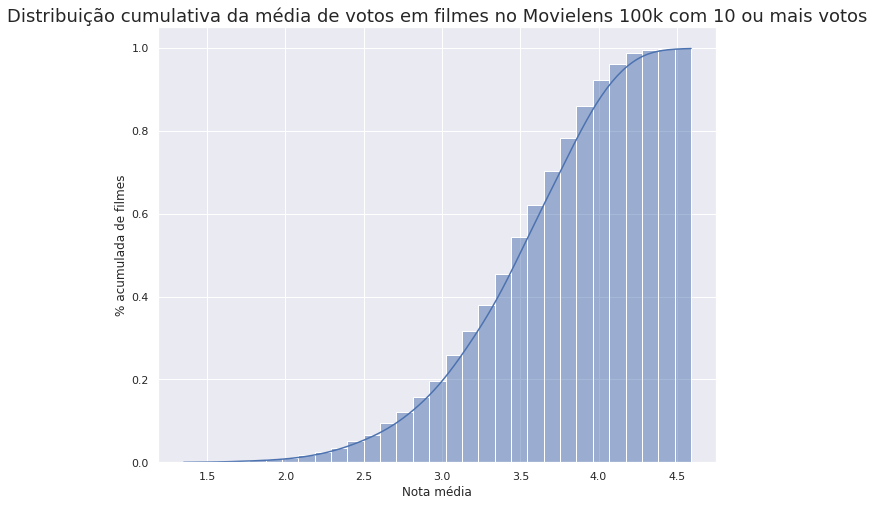

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, kde=True, stat='density', cumulative=True)
ax.set(xlabel='Nota média', ylabel='% acumulada de filmes')
ax.set_title('Distribuição cumulativa da média de votos em filmes no Movielens 100k com 10 ou mais votos', fontsize=18);

# Analisando a distribuição dos dados capturados de outros campos do TMDB

In [ ]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


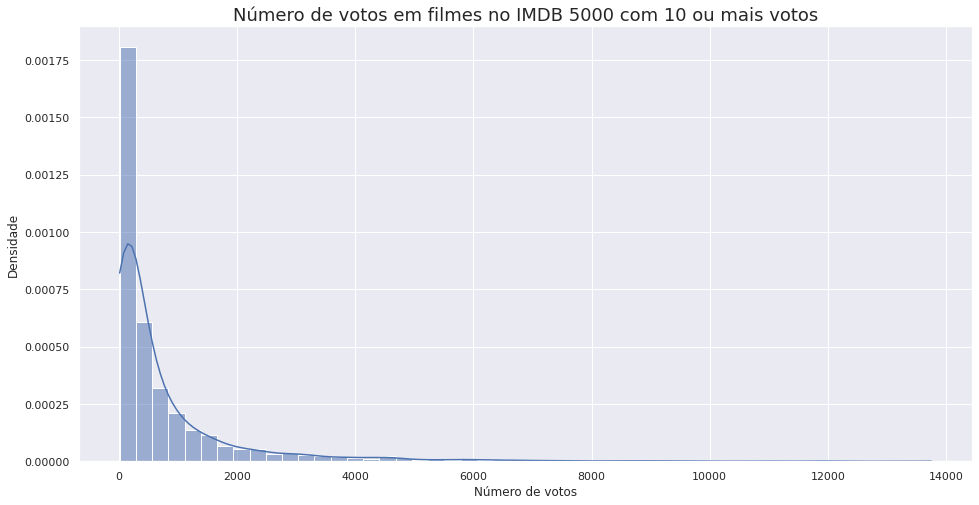

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.histplot(tmdb_com_mais_de_10_votos.vote_count, kde=True, stat='density', bins=50)
ax.set(xlabel='Número de votos', ylabel='Densidade')
ax.set_title('Número de votos em filmes no IMDB 5000 com 10 ou mais votos', fontsize=18);

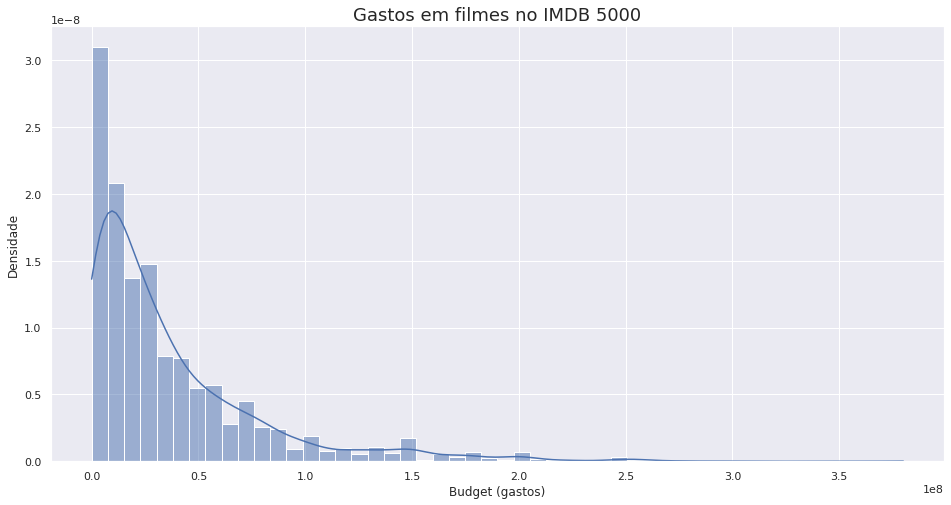

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.histplot(tmdb.query('budget > 0').budget, kde=True, stat='density', bins=50)
ax.set(xlabel='Budget (gastos)', ylabel='Densidade')
ax.set_title('Gastos em filmes no IMDB 5000', fontsize=18);

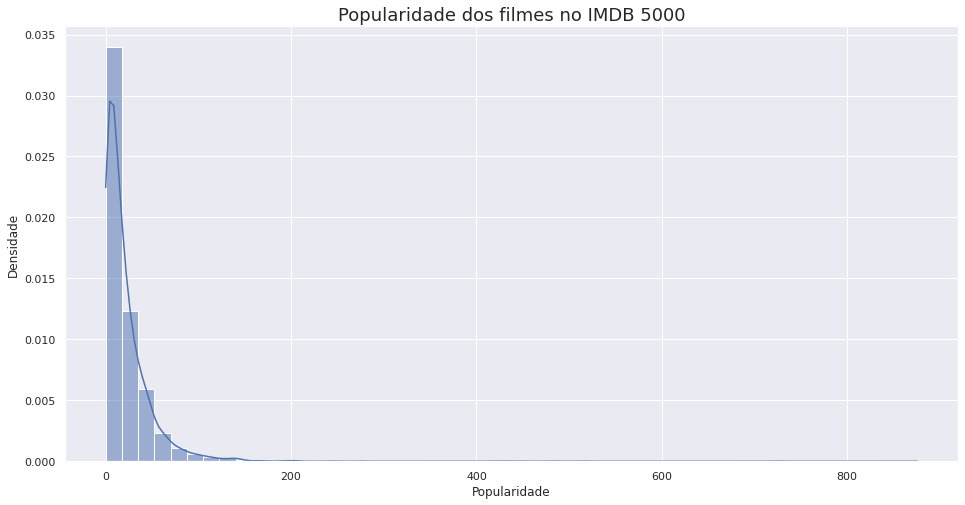

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.histplot(tmdb.popularity, kde=True, stat='density', bins=50)
ax.set(xlabel='Popularidade', ylabel='Densidade')
ax.set_title('Popularidade dos filmes no IMDB 5000', fontsize=18);

In [ ]:
tmdb.runtime.isnull().sum()

2

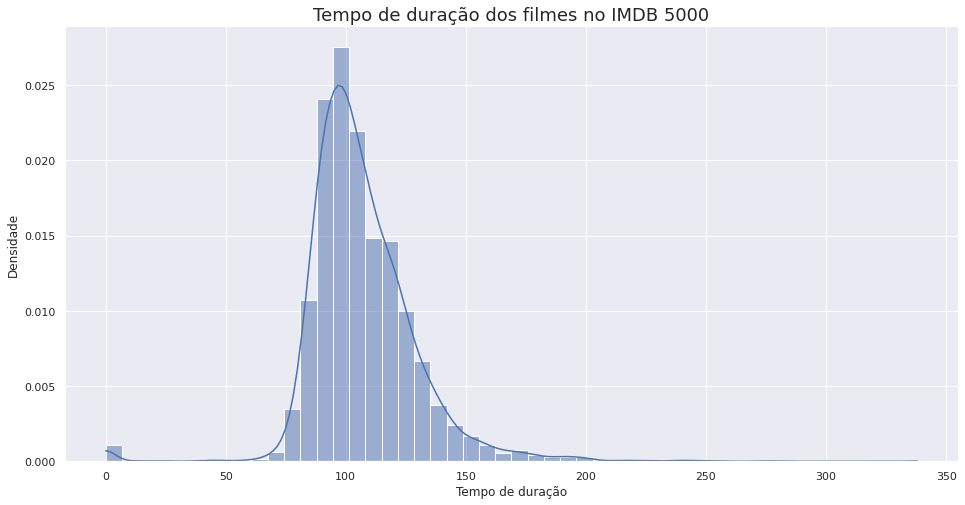

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.histplot(tmdb.runtime.dropna(), kde=True, stat='density', bins=50)
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Tempo de duração dos filmes no IMDB 5000', fontsize=18);

In [ ]:
tmdb.query('runtime == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1011,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,53953,"[{""id"": 10292, ""name"": ""gore""}, {""id"": 12339, ...",de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.716764,[],[],2006-08-08,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,The Tooth Fairy,4.3,13
3112,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,41894,[],en,Blood Done Sign My Name,A drama based on the true story in which a bla...,0.397341,[],[],2010-02-01,0,0.0,[],Released,No one changes the world alone.,Blood Done Sign My Name,6.0,5
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-21,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,How to Fall in Love,5.2,20
3953,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",NaN,281230,"[{""id"": 187056, ""name"": ""woman director""}]",en,Fort McCoy,Unable to serve in World War II because of a h...,0.384496,[],[],2014-01-01,0,0.0,[],Released,NaN,Fort McCoy,6.3,2
3992,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,NaN,Sardaarji,9.5,2
4068,0,[],NaN,371085,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,[],[],2015-01-01,0,0.0,[],Released,NaN,Sharkskin,0.0,0
4118,0,[],NaN,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],2000-05-26,0,0.0,[],Released,NaN,Hum To Mohabbat Karega,0.0,0
4205,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.imdb.com/title/tt1289419/,66468,[],en,N-Secure,N-Secure is a no holds-barred thrilling drama ...,0.134560,[],[],2010-10-15,2592808,0.0,[],Released,NaN,N-Secure,4.3,4
4210,0,"[{""id"": 10749, ""name"": ""Romance""}]",NaN,74084,[],hi,दिल जो भी कहे,"During the British rule in India, several Indi...",0.122704,"[{""name"": ""Entertainment One Pvt. Ltd."", ""id"":...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2006-12-07,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Dil Jo Bhi Kahey...,0.0,0


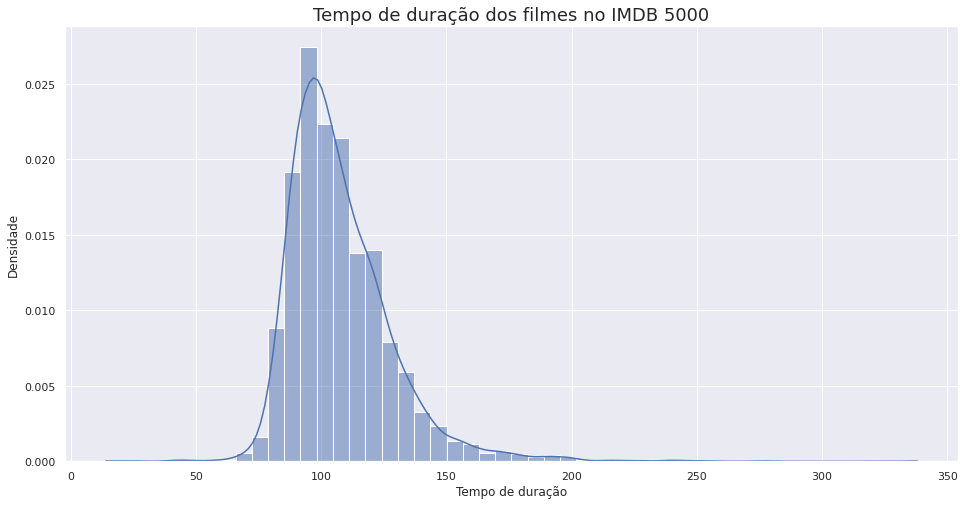

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.histplot(tmdb.query('runtime > 0').runtime.dropna(), kde=True, stat='density', bins=50)
ax.set(xlabel='Tempo de duração', ylabel='Densidade')
ax.set_title('Tempo de duração dos filmes no IMDB 5000', fontsize=18);

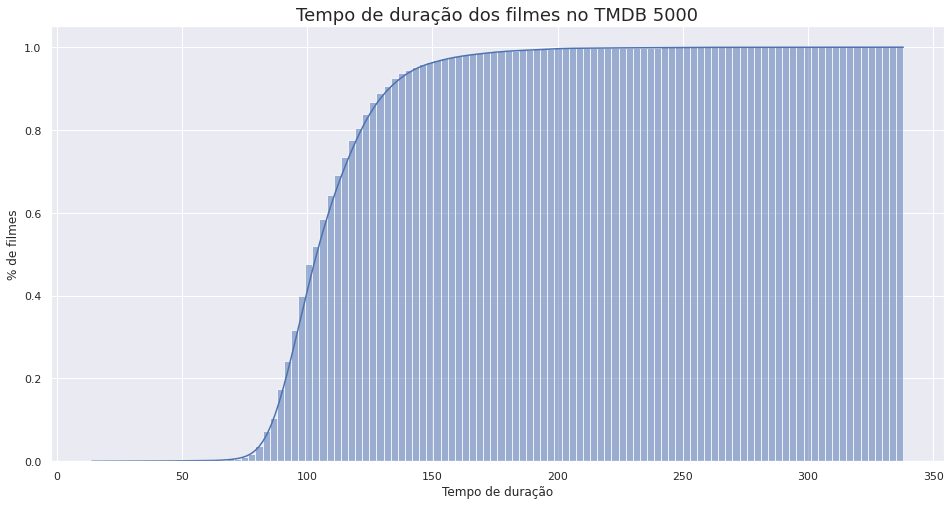

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.histplot(tmdb.query('runtime > 0').runtime.dropna(), kde=True, stat='density', cumulative=True)
ax.set(xlabel='Tempo de duração', ylabel='% de filmes')
ax.set_title('Tempo de duração dos filmes no TMDB 5000', fontsize=18);

In [ ]:
tmdb.query('runtime > 0').runtime.dropna().quantile(0.8)

121.0

# Movielens: média dos filmes com pelo menos 10 votos

In [ ]:
print(f'Média dos filmes com pelo menos 10 votos: {nota_media_dos_filmes_com_pelo_menos_10_votos.mean():.4f}')
# nota_media_dos_filmes_com_pelo_menos_10_votos.mean()

Média dos filmes com pelo menos 10 votos: 3.4321


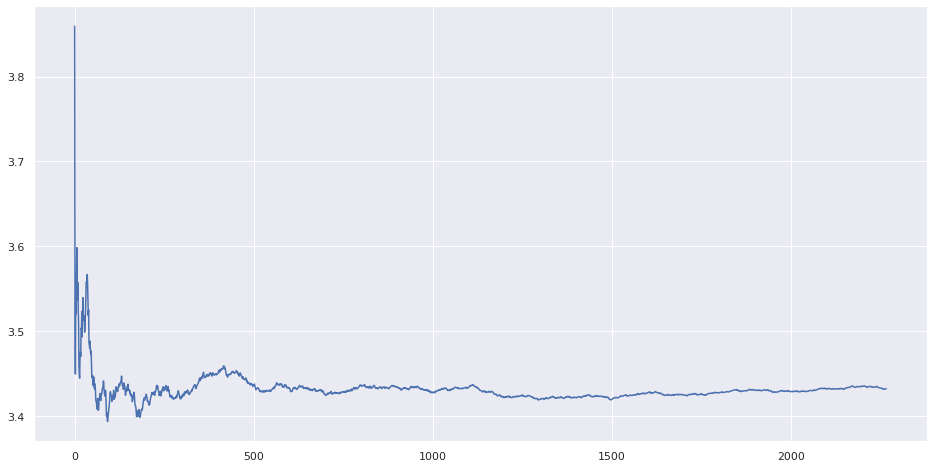

In [ ]:
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.figure(figsize=(16, 8))
plt.plot(medias);

In [ ]:
from statsmodels.stats.weightstats import zconfint
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [ ]:
# Como o tamanho da amostra é bem maior que 30 (>2000), não seria necessário realizar o t_test, mas vamos averiguar o resultado mesmo assim:

from statsmodels.stats.weightstats import DescrStatsW
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Vamos ver o filme 1

In [ ]:
filmes = pd.read_csv('https://github.com/alura-cursos/data-science-introducao-a-testes-estatisticos-com-python/raw/master/aula0/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
notas1 = notas.query('movieId == 1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


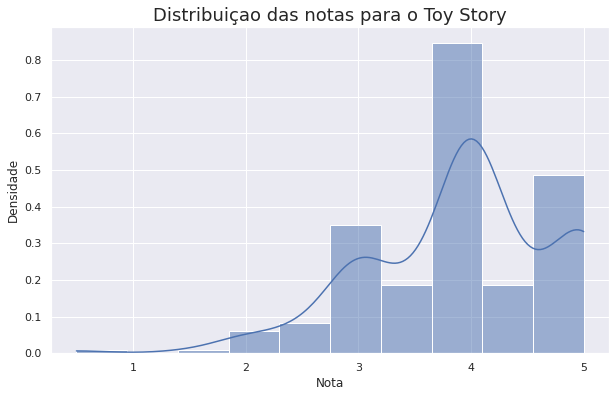

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(notas1.rating, kde=True, stat='density', bins=10)
ax.set(xlabel='Nota', ylabel='Densidade')
ax.set_title('Distribuiçao das notas para o Toy Story', fontsize=18);

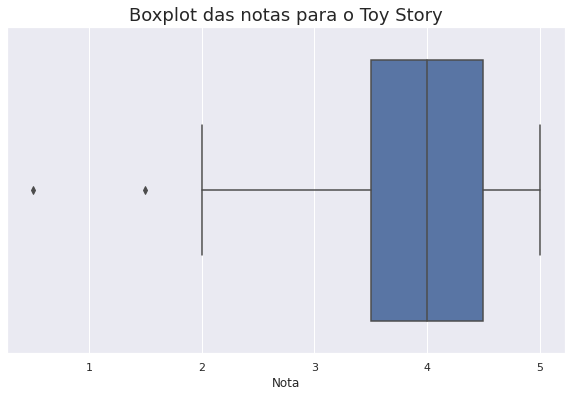

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=notas1, x='rating')
ax.set(xlabel='Nota')
ax.set_title('Boxplot das notas para o Toy Story', fontsize=18);

In [ ]:
notas1.rating.mean()

3.9209302325581397

In [ ]:
notas1.rating.count()

215

In [ ]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [ ]:
from statsmodels.stats.weightstats import ztest

ztest(notas1.rating, value=nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

(8.586342305916716, 8.978190401886942e-18)

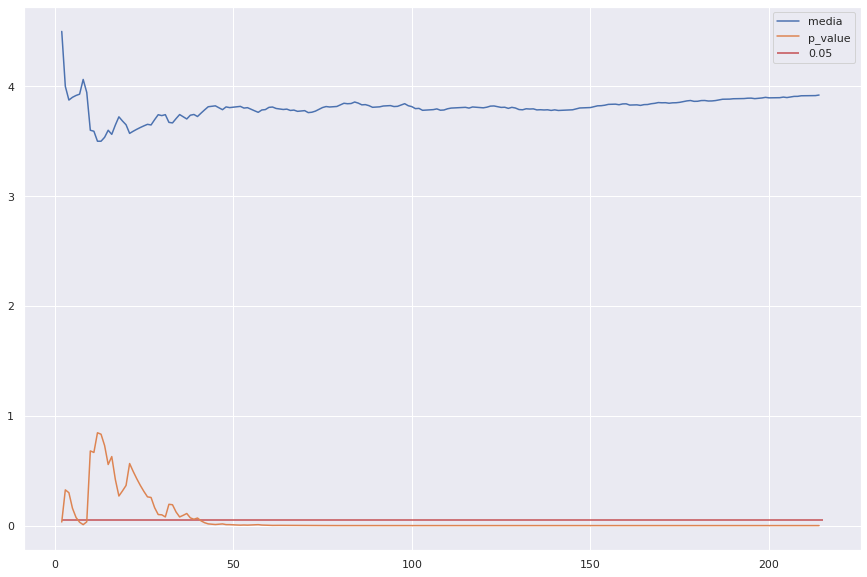

In [ ]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p_value = ztest(temp[0:i], value=nota_media_dos_filmes_com_pelo_menos_10_votos.mean())
    return (i, media, p_value)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.figure(figsize=(15, 10))
plt.plot(valores[:,0], valores[:,1], label='media')
plt.plot(valores[:,0], valores[:,2], label='p_value')
plt.hlines(y=0.05, xmin=2, xmax=len(temp), colors='r', label='0.05')
plt.legend();

# Comparação de dois conjuntos de amostras

In [ ]:
stat_test, p_valor = ztest(notas1.rating, notas.rating)
print(f'Estatística do teste = {stat_test:.3f}, p-valor = {p_valor}')
print(f'Como o resultado de p-valor é menor que 0.05 podemos dizer que há uma diferença significativa entre as duas médias.\n')

int_confianca = zconfint(notas1.rating, notas.rating)
print(f'A média de "notas1.rating" (Toy Story) é entre {int_confianca[0].round(4)} e {int_confianca[1].round(4)} mais alta que "notas.rating" (Todos os filmes).')

Estatística do teste = 5.894, p-valor = 3.762112778881965e-09
Como o resultado de p-valor é menor que 0.05 podemos dizer que há uma diferença significativa entre as duas médias.

A média de "notas1.rating" (Toy Story) é entre 0.2799 e 0.5588 mais alta que "notas.rating" (Todos os filmes).


In [ ]:
from scipy.stats import ttest_ind

ttest_ind(notas1.rating, notas.rating)

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [ ]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_toystory.get_compare(descr_todas_as_notas)
print(comparacao.summary()) # use_t=False -> z_test

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.4194      0.071      5.894      0.000       0.280       0.559


In [ ]:
print(comparacao.summary(use_t=True)) # t_test

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.4194      0.071      5.894      0.000       0.280       0.559


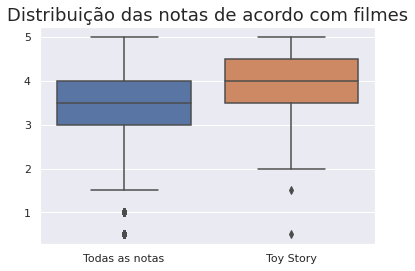

In [ ]:
plt.title('Distribuição das notas de acordo com filmes', fontsize=18);
g = sns.boxplot(data=[notas.rating, notas1.rating])
g.set_xticklabels(labels=['Todas as notas', 'Toy Story']);

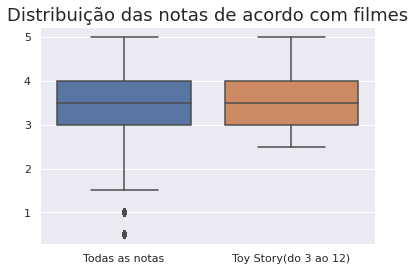

In [ ]:
plt.title('Distribuição das notas de acordo com filmes', fontsize=18);
g = sns.boxplot(data=[notas.rating, notas1[3:12].rating])
g.set_xticklabels(labels=['Todas as notas', 'Toy Story(do 3 ao 12)']);

In [ ]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating) # Comparação apenas com um subset de Toy Story
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
print(comparacao.summary(use_t=True))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0540      0.348     -0.155      0.877      -0.735       0.627


# Comparar as médias de alguns filmes

In [ ]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


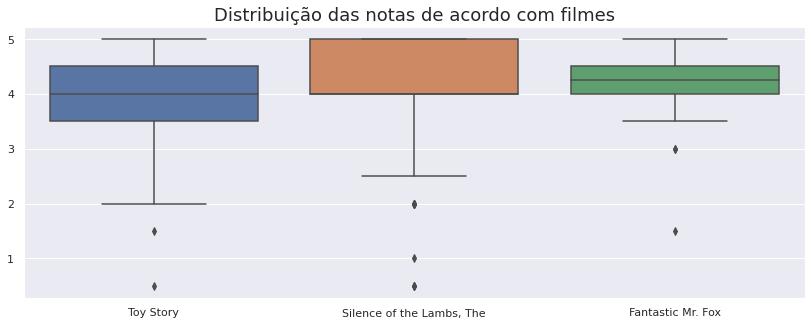

In [ ]:
notas1 = notas.query('movieId == 1')
notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')

plt.figure(figsize=(14,5))
plt.title('Distribuição das notas de acordo com filmes', fontsize=18);
g = sns.boxplot(data=[notas1.rating, notas593.rating, notas72226.rating])
g.set_xticklabels(labels=['Toy Story', 'Silence of the Lambs, The', 'Fantastic Mr. Fox']);

In [ ]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


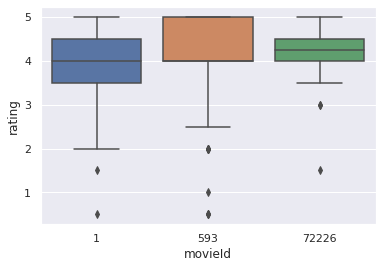

In [ ]:
sns.boxplot(data=notas.query('movieId in (1, 593, 72226)'), x='movieId', y='rating');

In [ ]:
notas.query('movieId in (1, 593, 72226)').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [ ]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)
print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.2404      0.077     -3.132      0.002      -0.391      -0.090


In [ ]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)
print(comparacao.summary(use_t=True))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0780      0.208     -0.374      0.708      -0.488       0.332


In [ ]:
comparacao = descr_1.get_compare(descr_72226)
print(comparacao.summary(use_t=True))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.1624      0.206     -0.788      0.431      -0.568       0.243


In [ ]:
from scipy.stats import normaltest

_, p_value = normaltest(notas1.rating)
print(f'p-value = {p_value}\n\nComo essa função testa a hipótese nula de que o conjunto de dados venha de uma distribuição normal,\num resultado menor que 0.05 indica que não estamos trabalhando com uma distribuição normal.')
print('\nPor não atenderem ao teste de normalidade, os conjuntos anteriores não poderiam ter sido submetidos ao z_test/t_test.')

p-value = 0.00011053430732728716

Como essa função testa a hipótese nula de que o conjunto de dados venha de uma distribuição normal,
um resultado menor que 0.05 indica que não estamos trabalhando com uma distribuição normal.

Por não atenderem ao teste de normalidade, os conjuntos anteriores não poderiam ter sido submetidos ao z_test/t_test.


In [ ]:
from scipy.stats import ranksums

stat, p_value = ranksums(notas1.rating, notas593.rating)
p_value

print(f'O ranksums consiste no teste Wilcoxon, que faz uma análise baseada em ranqueamento.\nA hipótese alternativa (p_value={p_value} foi bem pequeno), é a de que os valores de uma amostra têm uma tendência a serem maiores que os da outra amostra.')

O ranksums consiste no teste Wilcoxon, que faz uma análise baseada em ranqueamento.
A hipótese alternativa (p_value=0.0003267718756440693 foi bem pequeno), é a de que os valores de uma amostra têm uma tendência a serem maiores que os da outra amostra.
